<a href="https://colab.research.google.com/github/Asaikumarnayak/python/blob/main/usl_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [214]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

In [215]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data sets/masculinity.csv')

In [216]:
df.head(2)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,...,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,...,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,...,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120


In [217]:
df['orientation'].value_counts()

Straight        1037
Gay/Bisexual     123
Other             22
No answer          6
Name: orientation, dtype: int64

In [218]:
df['kids'].value_counts()

Has children    818
No children     365
Name: kids, dtype: int64

In [219]:
df.shape

(1189, 98)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1189 non-null   int64  
 1   StartDate    1189 non-null   object 
 2   EndDate      1189 non-null   object 
 3   q0001        1189 non-null   object 
 4   q0002        1189 non-null   object 
 5   q0004_0001   1189 non-null   object 
 6   q0004_0002   1189 non-null   object 
 7   q0004_0003   1189 non-null   object 
 8   q0004_0004   1189 non-null   object 
 9   q0004_0005   1189 non-null   object 
 10  q0004_0006   1189 non-null   object 
 11  q0005        1189 non-null   object 
 12  q0007_0001   1189 non-null   object 
 13  q0007_0002   1189 non-null   object 
 14  q0007_0003   1189 non-null   object 
 15  q0007_0004   1189 non-null   object 
 16  q0007_0005   1189 non-null   object 
 17  q0007_0006   1189 non-null   object 
 18  q0007_0007   1189 non-null   object 
 19  q0007_

In [221]:
# for col in df.columns:
#   print(df[col].dtypes)
#   # print(col)

In [222]:
df.describe()

,Unnamed: 0,weight
count,1189.000000,1188.000000
mean,595.000000,0.845104
std,343.379042,1.256521
min,1.000000,0.019744
25%,298.000000,0.074933
50%,595.000000,0.536891
75%,892.000000,0.802008
max,1189.000000,8.676606


In [223]:
import sklearn
sklearn.__version__

'1.0.1'

In [224]:
for col in df.columns:
  print(col,"missing values--->",df[col].isna().sum())


Unnamed: 0 missing values---> 0
StartDate missing values---> 0
EndDate missing values---> 0
q0001 missing values---> 0
q0002 missing values---> 0
q0004_0001 missing values---> 0
q0004_0002 missing values---> 0
q0004_0003 missing values---> 0
q0004_0004 missing values---> 0
q0004_0005 missing values---> 0
q0004_0006 missing values---> 0
q0005 missing values---> 0
q0007_0001 missing values---> 0
q0007_0002 missing values---> 0
q0007_0003 missing values---> 0
q0007_0004 missing values---> 0
q0007_0005 missing values---> 0
q0007_0006 missing values---> 0
q0007_0007 missing values---> 0
q0007_0008 missing values---> 0
q0007_0009 missing values---> 0
q0007_0010 missing values---> 0
q0007_0011 missing values---> 0
q0008_0001 missing values---> 0
q0008_0002 missing values---> 0
q0008_0003 missing values---> 0
q0008_0004 missing values---> 0
q0008_0005 missing values---> 0
q0008_0006 missing values---> 0
q0008_0007 missing values---> 0
q0008_0008 missing values---> 0
q0008_0009 missing values--

In [225]:
df.duplicated().sum()
# df.drop_duplicates()

0

In [226]:
df.drop(df.iloc[:, 37:60], inplace = True, axis = 1)


In [227]:
df.shape

(1189, 75)

In [228]:
for col in df.columns:
  print(col,"missing values--->",df[col].isna().sum())


Unnamed: 0 missing values---> 0
StartDate missing values---> 0
EndDate missing values---> 0
q0001 missing values---> 0
q0002 missing values---> 0
q0004_0001 missing values---> 0
q0004_0002 missing values---> 0
q0004_0003 missing values---> 0
q0004_0004 missing values---> 0
q0004_0005 missing values---> 0
q0004_0006 missing values---> 0
q0005 missing values---> 0
q0007_0001 missing values---> 0
q0007_0002 missing values---> 0
q0007_0003 missing values---> 0
q0007_0004 missing values---> 0
q0007_0005 missing values---> 0
q0007_0006 missing values---> 0
q0007_0007 missing values---> 0
q0007_0008 missing values---> 0
q0007_0009 missing values---> 0
q0007_0010 missing values---> 0
q0007_0011 missing values---> 0
q0008_0001 missing values---> 0
q0008_0002 missing values---> 0
q0008_0003 missing values---> 0
q0008_0004 missing values---> 0
q0008_0005 missing values---> 0
q0008_0006 missing values---> 0
q0008_0007 missing values---> 0
q0008_0008 missing values---> 0
q0008_0009 missing values--

In [229]:
df.drop(df.iloc[:, 29:46], inplace = True, axis = 1)


In [230]:
df.shape

(1189, 58)

In [231]:
for col in df.columns:
  print(col,"missing values--->",df[col].isna().sum())

Unnamed: 0 missing values---> 0
StartDate missing values---> 0
EndDate missing values---> 0
q0001 missing values---> 0
q0002 missing values---> 0
q0004_0001 missing values---> 0
q0004_0002 missing values---> 0
q0004_0003 missing values---> 0
q0004_0004 missing values---> 0
q0004_0005 missing values---> 0
q0004_0006 missing values---> 0
q0005 missing values---> 0
q0007_0001 missing values---> 0
q0007_0002 missing values---> 0
q0007_0003 missing values---> 0
q0007_0004 missing values---> 0
q0007_0005 missing values---> 0
q0007_0006 missing values---> 0
q0007_0007 missing values---> 0
q0007_0008 missing values---> 0
q0007_0009 missing values---> 0
q0007_0010 missing values---> 0
q0007_0011 missing values---> 0
q0008_0001 missing values---> 0
q0008_0002 missing values---> 0
q0008_0003 missing values---> 0
q0008_0004 missing values---> 0
q0008_0005 missing values---> 0
q0008_0006 missing values---> 0
q0020_0002 missing values---> 0
q0020_0003 missing values---> 0
q0020_0004 missing values--

In [232]:
df.dropna(inplace=True)

In [233]:
df.shape

(1171, 58)

In [234]:
df.isna().sum()

Unnamed: 0     0
StartDate      0
EndDate        0
q0001          0
q0002          0
q0004_0001     0
q0004_0002     0
q0004_0003     0
q0004_0004     0
q0004_0005     0
q0004_0006     0
q0005          0
q0007_0001     0
q0007_0002     0
q0007_0003     0
q0007_0004     0
q0007_0005     0
q0007_0006     0
q0007_0007     0
q0007_0008     0
q0007_0009     0
q0007_0010     0
q0007_0011     0
q0008_0001     0
q0008_0002     0
q0008_0003     0
q0008_0004     0
q0008_0005     0
q0008_0006     0
q0020_0002     0
q0020_0003     0
q0020_0004     0
q0020_0005     0
q0020_0006     0
q0021_0001     0
q0021_0002     0
q0021_0003     0
q0021_0004     0
q0022          0
q0024          0
q0025_0001     0
q0025_0002     0
q0025_0003     0
q0026          0
q0028          0
q0029          0
q0030          0
q0034          0
q0035          0
q0036          0
race2          0
racethn4       0
educ3          0
educ4          0
age3           0
kids           0
orientation    0
weight         0
dtype: int64

In [235]:
df.head()

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,No,Rarely,Rarely,Sometimes,Rarely,Rarely,Often,"Never, and not open to it","Never, and not open to it",Rarely,"Never, and not open to it","Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,No answer,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,Yes,Sometimes,Rarely,"Never, and not open to it","Never, but open to it","Never, but

In [237]:
df=df.drop(['Unnamed: 0','StartDate','EndDate'],axis=1)

In [238]:
df.head()

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,No,Rarely,Rarely,Sometimes,Rarely,Rarely,Often,"Never, and not open to it","Never, and not open to it",Rarely,"Never, and not open to it","Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,No answer,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,Yes,Sometimes,Rarely,"Never, and not open to it","Never, but open to it","Never, but open to it",Sometimes,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes,Not selected,Your weight,Not selected,Not selected,Not selected,Not sel

In [239]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [240]:
dfle=df
dfle.q0001=lb.fit_transform(dfle.q0001)

In [241]:
df.head()

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,3,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,3,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,4,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,No,Rarely,Rarely,Sometimes,Rarely,Rarely,Often,"Never, and not open to it","Never, and not open to it",Rarely,"Never, and not open to it","Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,No answer,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,4,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,Yes,Sometimes,Rarely,"Never, and not open to it","Never, but open to it","Never, but open to it",Sometimes,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Ask for a verbal confirmation of consent,Not selected,Not selected,

In [242]:

dfle.q0002=lb.fit_transform(dfle.q0002)

In [244]:
dfle.q0005=lb.fit_transform(dfle.q0005)

In [247]:
dfle.q0007_0001=lb.fit_transform(dfle.q0007_0001)

In [248]:
df.q0007_0001.value_counts()

5    527
4    319
3    141
1    121
0     53
2     10
Name: q0007_0001, dtype: int64

In [245]:
df.head()

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,3,3,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,2,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,3,3,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,2,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,4,2,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),0,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,Married,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,2,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,0,Rarely,Rarely,Sometimes,Rarely,Rarely,Often,"Never, and not open to it","Never, and not open to it",Rarely,"Never, and not open to it","Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,No answer,Married,Not selected,"Yes, one or more children 18 or older",Not selected,No answer,White,Some college,Indiana,"$50,000-$74,999",East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,4,4,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,2,Sometimes,Rarely,"Never, and not open to it","Never, but open to it","Never, but open to it",Sometimes,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Ask for a verbal confirmation of consent,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,No,N

In [249]:
x=df[['q0001','q0002','q0005','q0007_0001','weight']]

In [250]:
x.head()

,q0001,q0002,q0005,q0007_0001,weight
0,3,3,2,3,1.714026
1,3,3,2,4,1.247120
2,4,2,0,5,0.515746
3,4,2,0,4,0.600640
4,4,4,2,5,1.033400


In [251]:
l=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init="k-means++")
  km.fit(x)
  l.append(km.inertia_)

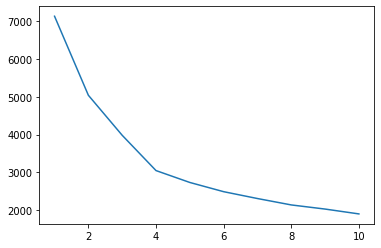

In [252]:
plt.plot(range(1,11),l)

In [253]:
# the best value for n is 4


In [254]:
km=KMeans(n_clusters=4,init="k-means++")
a=km.fit_predict(x)

In [257]:
a

array([1, 1, 0, ..., 1, 0, 2], dtype=int32)

In [259]:
# the output says the first record belongs to 1 cluster
a.shape

(1171,)

In [258]:
x

,q0001,q0002,q0005,q0007_0001,weight
0,3,3,2,3,1.714026
1,3,3,2,4,1.247120
2,4,2,0,5,0.515746
3,4,2,0,4,0.600640
4,4,4,2,5,1.033400
...,...,...,...,...,...
1183,4,1,0,3,0.706661
1184,3,1,2,5,1.571755
1185,3,3,2,5,2.446719
1186,4,4,0,3,0.615180


In [261]:
# to know the centroids 
km.cluster_centers_

array([[3.35835351, 2.55447942, 0.00726392, 4.42372881, 0.62729286],
       [3.22201835, 2.4440367 , 1.99449541, 4.39449541, 0.63244122],
       [3.03508772, 2.28654971, 1.07602339, 0.77192982, 0.67733832],
       [2.88095238, 2.52380952, 1.19047619, 2.88095238, 6.02367764]])